# COVID-19 Pandemic Preparedness - A Holistic Analysis

In the wake of global health crises like the COVID-19 pandemic, it has become increasingly evident that a multi-faceted approach is essential to mitigate the devastating impacts of such events. Effective pandemic preparedness and response require a synergy of early detection, stringent policy measures, robust healthcare infrastructure, vaccination programs, and socioeconomic resilience.

This analysis focuses on answering a pivotal question: **What can we learn from the COVID-19 pandemic to prepare for and mitigate the impacts of future pandemics?**

The hypothesis driving this analysis is:
> **Countries that effectively combine early, widespread testing, non-pharmaceutical interventions (e.g., lockdowns, mask mandates), robust healthcare infrastructure, high vaccination coverage, and strong socioeconomic support systems experience reduced mortality and better outcomes during a pandemic.**

This hypothesis guides the exploration of key metrics and their interrelationships to identify actionable insights for future pandemic preparedness. The analysis follows the CRISP-DM methodology and consists of the following steps:

1. [Business Understanding](#business-understanding)
2. [Data Understanding](#data-understanding)
3. [Data Preparation](#data-preparation)
4. [Modeling](#modeling)
5. [Evaluation](#evaluation)
6. [Conclusions](#conclusions)


<div id='business-understanding'/>

## 1. Business Understanding

The central goal of this study is to explore how different factors interact to influence a country's ability to handle a pandemic. By breaking this broad question into specific, actionable sub-questions, we aim to:

1. **Understand the role of early testing:** How does widespread and early testing impact infection and mortality rates?
2. **Evaluate the effectiveness of interventions:** To what extent do stringent public health measures contribute to controlling the pandemic?
3. **Assess healthcare capacity:** How does healthcare infrastructure (e.g., ICU availability) correlate with mortality outcomes?
4. **Examine vaccination programs:** What role does timely and widespread vaccination play in mitigating severe cases and deaths?
5. **Incorporate socioeconomic factors:** How do socioeconomic conditions influence the overall resilience of countries during a pandemic?

This analysis strives to bridge the knowledge gap and provide actionable insights that governments and health organizations can use to prepare for future health crises.

---

<div id='data-understanding'/>

## 2. Data Understanding

The dataset used for this analysis comes from **Our World in Data (OWID)** and includes a comprehensive set of metrics related to COVID-19. Key metrics include:

1. **Testing and detection metrics:** 
   - `tests_per_case`, `new_tests_smoothed_per_thousand`
2. **Public health interventions:**
   - `stringency_index`
3. **Healthcare capacity:**
   - `hospital_beds_per_thousand`, `icu_patients_per_million`
4. **Vaccination coverage:**
   - `people_vaccinated_per_hundred`, `total_vaccinations_per_hundred`
5. **Outcome metrics:**
   - `new_deaths_smoothed_per_million`, `excess_mortality_cumulative_per_million`
6. **Socioeconomic factors:**
   - `gdp_per_capita`, `human_development_index`, `handwashing_facilities`

The data spans multiple countries and time periods, providing a rich ground for cross-country comparisons and time-series analysis.

---

<div id='data-preparation'/>

## 3. Data Preparation

To ensure the reliability of the analysis, the dataset was cleaned and prepared as follows:
1. Missing values in critical metrics (e.g., `stringency_index`, `tests_per_case`) were addressed by removing rows or imputing with relevant methods.
2. Lagged variables were created for testing, stringency, and vaccination metrics to account for delayed effects.
3. Data was standardized to ensure comparability across metrics and countries.

---

<div id='modeling'/>

## 4. Modeling

A Bayesian hierarchical model was employed to explore the relationships between the key factors and outcomes, accounting for country-level variations. Key model features include:
- Random intercepts for each country to capture inherent differences.
- Priors informed by domain knowledge to ensure meaningful estimates.
- Lagged predictors to explore the delayed impact of testing and interventions.

The model provides posterior distributions for key parameters, enabling uncertainty quantification and scenario analysis.

---

<div id='evaluation'/>

## 5. Evaluation

The model was evaluated using:
- **Out-of-sample RMSE** to assess predictive accuracy.
- **Posterior predictive checks (PPCs)** to ensure consistency between observed and predicted outcomes.
- **Scenario analysis** to explore the effects of increasing/decreasing testing, stringency, and vaccination rates.

---

<div id='conclusions'/>

## 6. Conclusions

The insights derived from this analysis underscore the importance of a holistic approach to pandemic preparedness. Key takeaways include:
- Early and widespread testing significantly reduces mortality.
- Stringent public health measures, while effective, must balance societal and economic impacts.
- Robust healthcare systems with sufficient ICU capacity are critical in reducing deaths.
- High vaccination coverage mitigates severe cases and mortality.

By implementing these learnings, countries can strengthen their resilience to future pandemics and minimize the devastating impacts on lives and livelihoods.


### 2.1. Prerequsities

In [ ]:
#Install required packages
!pip install numpy pandas matplotlib seaborn scipy statsmodels pymc arviz

In [ ]:
#Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from sklearn.preprocessing import StandardScaler

import scipy.stats as st
import statsmodels.api as sm

import pymc as pm
import arviz as az

In [ ]:
#Load the dataset
df = pd.read_csv('owid_covid.csv')

#look at the shape of the dataframe to ensure it's loaded correctly
print("DataFrame Shape:", df.shape)

#Display the first few rows to understand the structure
df.head()

DataFrame Shape: (456850, 61)


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [ ]:
#Initial Data Exploration
# Checking for missing values in key columns to understand data completeness
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

# Show summary statistics for numeric columns
df.describe(include='all')

Missing values per column:
 life_expectancy                            456850
weekly_icu_admissions_per_million          445857
weekly_icu_admissions                      445857
excess_mortality_cumulative_per_million    443312
excess_mortality                           443278
                                            ...  
total_cases                                 11850
total_deaths_per_million                    11850
total_cases_per_million                     11850
date                                            0
country                                         0
Length: 61, dtype: int64


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,456850,456850,4.450000e+05,4.428850e+05,4.416640e+05,445000.000000,442885.000000,441664.000000,4.450000e+05,443471.000000,...,4.413900e+05,434265.000000,436050.000000,0.0,356249.000000,286993.000000,384774.000000,206881.000000,274919.000000,365715.000000
unique,262,1791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Slovakia,2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1789,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.280172e+07,1.224215e+04,1.227605e+04,117228.039117,114.906283,115.228500,1.447465e+05,116.898368,...,1.312462e+08,391.394833,31.161292,NaN,22497.337838,11.092994,9.043640,59.099042,3.181591,0.725527
std,NaN,NaN,6.877807e+07,1.262666e+05,1.077941e+05,166464.409605,1055.783311,542.674246,7.386218e+05,864.588570,...,6.694495e+08,1782.834941,9.676867,NaN,22546.410099,18.374951,5.237886,31.902318,2.566303,0.153962
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,5.130000e+02,0.136470,14.298000,NaN,708.178300,0.000000,1.100000,3.440189,0.300000,0.380000
25%,NaN,NaN,7.375000e+03,0.000000e+00,0.000000e+00,2286.345575,0.000000,0.000000,5.500000e+01,0.000000,...,4.553740e+05,36.265860,22.244000,NaN,5155.620000,0.243796,5.600000,26.200474,1.320000,0.608000
50%,NaN,NaN,7.141600e+04,0.000000e+00,1.057143e+01,33228.562000,0.000000,2.228064,8.850000e+02,0.000000,...,6.280316e+06,92.084660,31.683000,NaN,14572.607000,1.318269,7.400000,70.153600,2.600000,0.741000
75%,NaN,NaN,9.811860e+05,1.280000e+02,3.115714e+02,164187.642500,15.700053,49.580578,1.094725e+04,1.000000,...,3.039500e+07,237.471000,39.080000,NaN,34663.496000,15.617013,11.100000,88.469350,4.260000,0.849000


In [ ]:
#Data Cleaning and Feature Selection

# Define the relevant columns for a holistic hypothesis:
relevant_columns = [
    'country', 'date',
    'tests_per_case', 'new_tests_smoothed_per_thousand',
    'stringency_index',
    'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
    'hospital_beds_per_thousand', 'weekly_icu_admissions_per_million', 'icu_patients_per_million',
    'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality_cumulative_per_million',
    'gdp_per_capita', 'human_development_index', 'handwashing_facilities'
]

# Filter the DataFrame to only include these relevant columns
df_holistic = df[relevant_columns].copy()

# Drop rows where country is missing (since its essential for grouping/identification)
df_holistic.dropna(subset=['country'], inplace=True)

print("DataFrame after focusing on relevant metrics:", df_holistic.shape)
df_holistic.head()

DataFrame after focusing on relevant metrics: (456850, 16)


,country,date,tests_per_case,new_tests_smoothed_per_thousand,stringency_index,people_vaccinated_per_hundred,total_vaccinations_per_hundred,hospital_beds_per_thousand,weekly_icu_admissions_per_million,icu_patients_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,excess_mortality_cumulative_per_million,gdp_per_capita,human_development_index,handwashing_facilities
0,Afghanistan,2020-01-01,NaN,NaN,0.0,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,1516.2733,0.462,48.214695
1,Afghanistan,2020-01-02,NaN,NaN,0.0,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,1516.2733,0.462,48.214695
2,Afghanistan,2020-01-03,NaN,NaN,0.0,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,1516.2733,0.462,48.214695
3,Afghanistan,2020-01-04,NaN,NaN,0.0,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,1516.2733,0.462,48.214695
4,Afghanistan,2020-01-05,NaN,NaN,0.0,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,1516.2733,0.462,48.214695


In [ ]:
#Handling Missing Data and Basic Data Quality Checks

# Check missing values in the filtered dataset
missing_values_holistic = df_holistic.isnull().sum().sort_values(ascending=False)
print("Missing values in the filtered dataset:\n", missing_values_holistic)

# Identify critical features for our holistic narrative:
critical_features = [
    'stringency_index', 'tests_per_case', 'new_tests_smoothed_per_thousand', 
    'people_vaccinated_per_hundred', 'hospital_beds_per_thousand'
]

# Drop rows that are missing any of the critical features
df_holistic = df_holistic.dropna(subset=critical_features, how='any')

print("DataFrame shape after dropping rows with missing critical features:", df_holistic.shape)
df_holistic.head()

Missing values in the filtered dataset:
 weekly_icu_admissions_per_million          445857
excess_mortality_cumulative_per_million    443312
icu_patients_per_million                   417734
people_vaccinated_per_hundred              377839
total_vaccinations_per_hundred             373628
tests_per_case                             355406
new_tests_smoothed_per_thousand            352885
stringency_index                           254090
handwashing_facilities                     249969
hospital_beds_per_thousand                 181931
gdp_per_capita                             100601
human_development_index                     91135
new_cases_smoothed_per_million              15186
new_deaths_smoothed_per_million             14596
country                                         0
date                                            0
dtype: int64
DataFrame shape after dropping rows with missing critical features: (30743, 16)


,country,date,tests_per_case,new_tests_smoothed_per_thousand,stringency_index,people_vaccinated_per_hundred,total_vaccinations_per_hundred,hospital_beds_per_thousand,weekly_icu_admissions_per_million,icu_patients_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,excess_mortality_cumulative_per_million,gdp_per_capita,human_development_index,handwashing_facilities
768,Afghanistan,2022-02-07,2.205620,0.032,19.44,11.420438,12.856447,0.39,NaN,NaN,14.261477,0.080971,NaN,1516.2733,0.462,48.214695
775,Afghanistan,2022-02-14,2.081265,0.032,19.44,11.640095,13.113502,0.39,NaN,NaN,15.535892,0.218270,NaN,1516.2733,0.462,48.214695
781,Afghanistan,2022-02-20,3.389429,0.032,19.44,11.832579,13.337760,0.39,NaN,NaN,6.259419,0.161942,NaN,1516.2733,0.462,48.214695
788,Afghanistan,2022-02-27,6.573062,0.032,19.44,12.092650,13.640738,0.39,NaN,NaN,4.400604,0.190106,NaN,1516.2733,0.462,48.214695
795,Afghanistan,2022-03-06,6.891709,0.026,19.44,12.205236,13.793221,0.39,NaN,NaN,4.108404,0.119696,NaN,1516.2733,0.462,48.214695


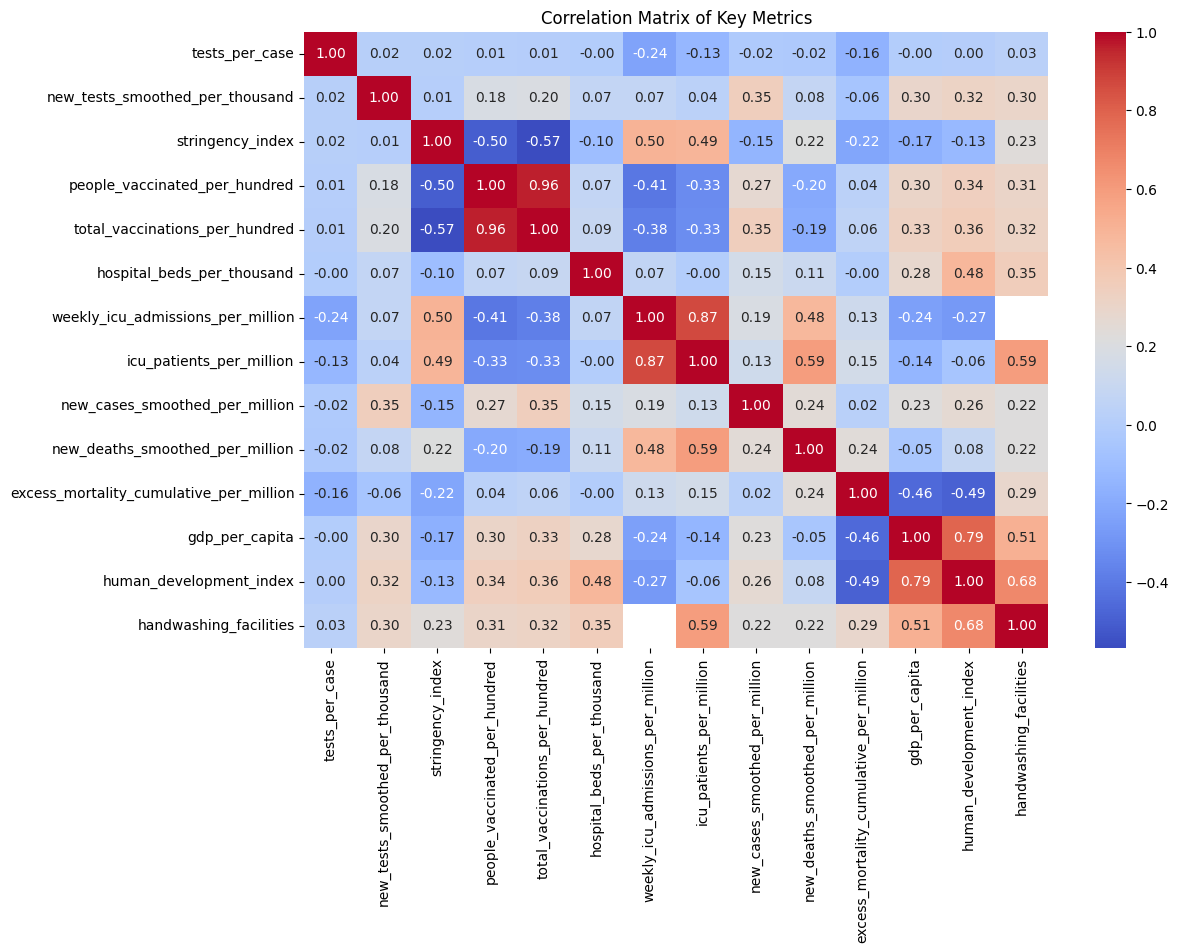

In [ ]:
#Exploratory Data Analysis - Correlation Matrix

#looking at the correlations between our chosen features to understand their relationships.

numeric_cols = df_holistic.select_dtypes(include=[np.number]).columns
corr_matrix = df_holistic[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Metrics")
plt.show()

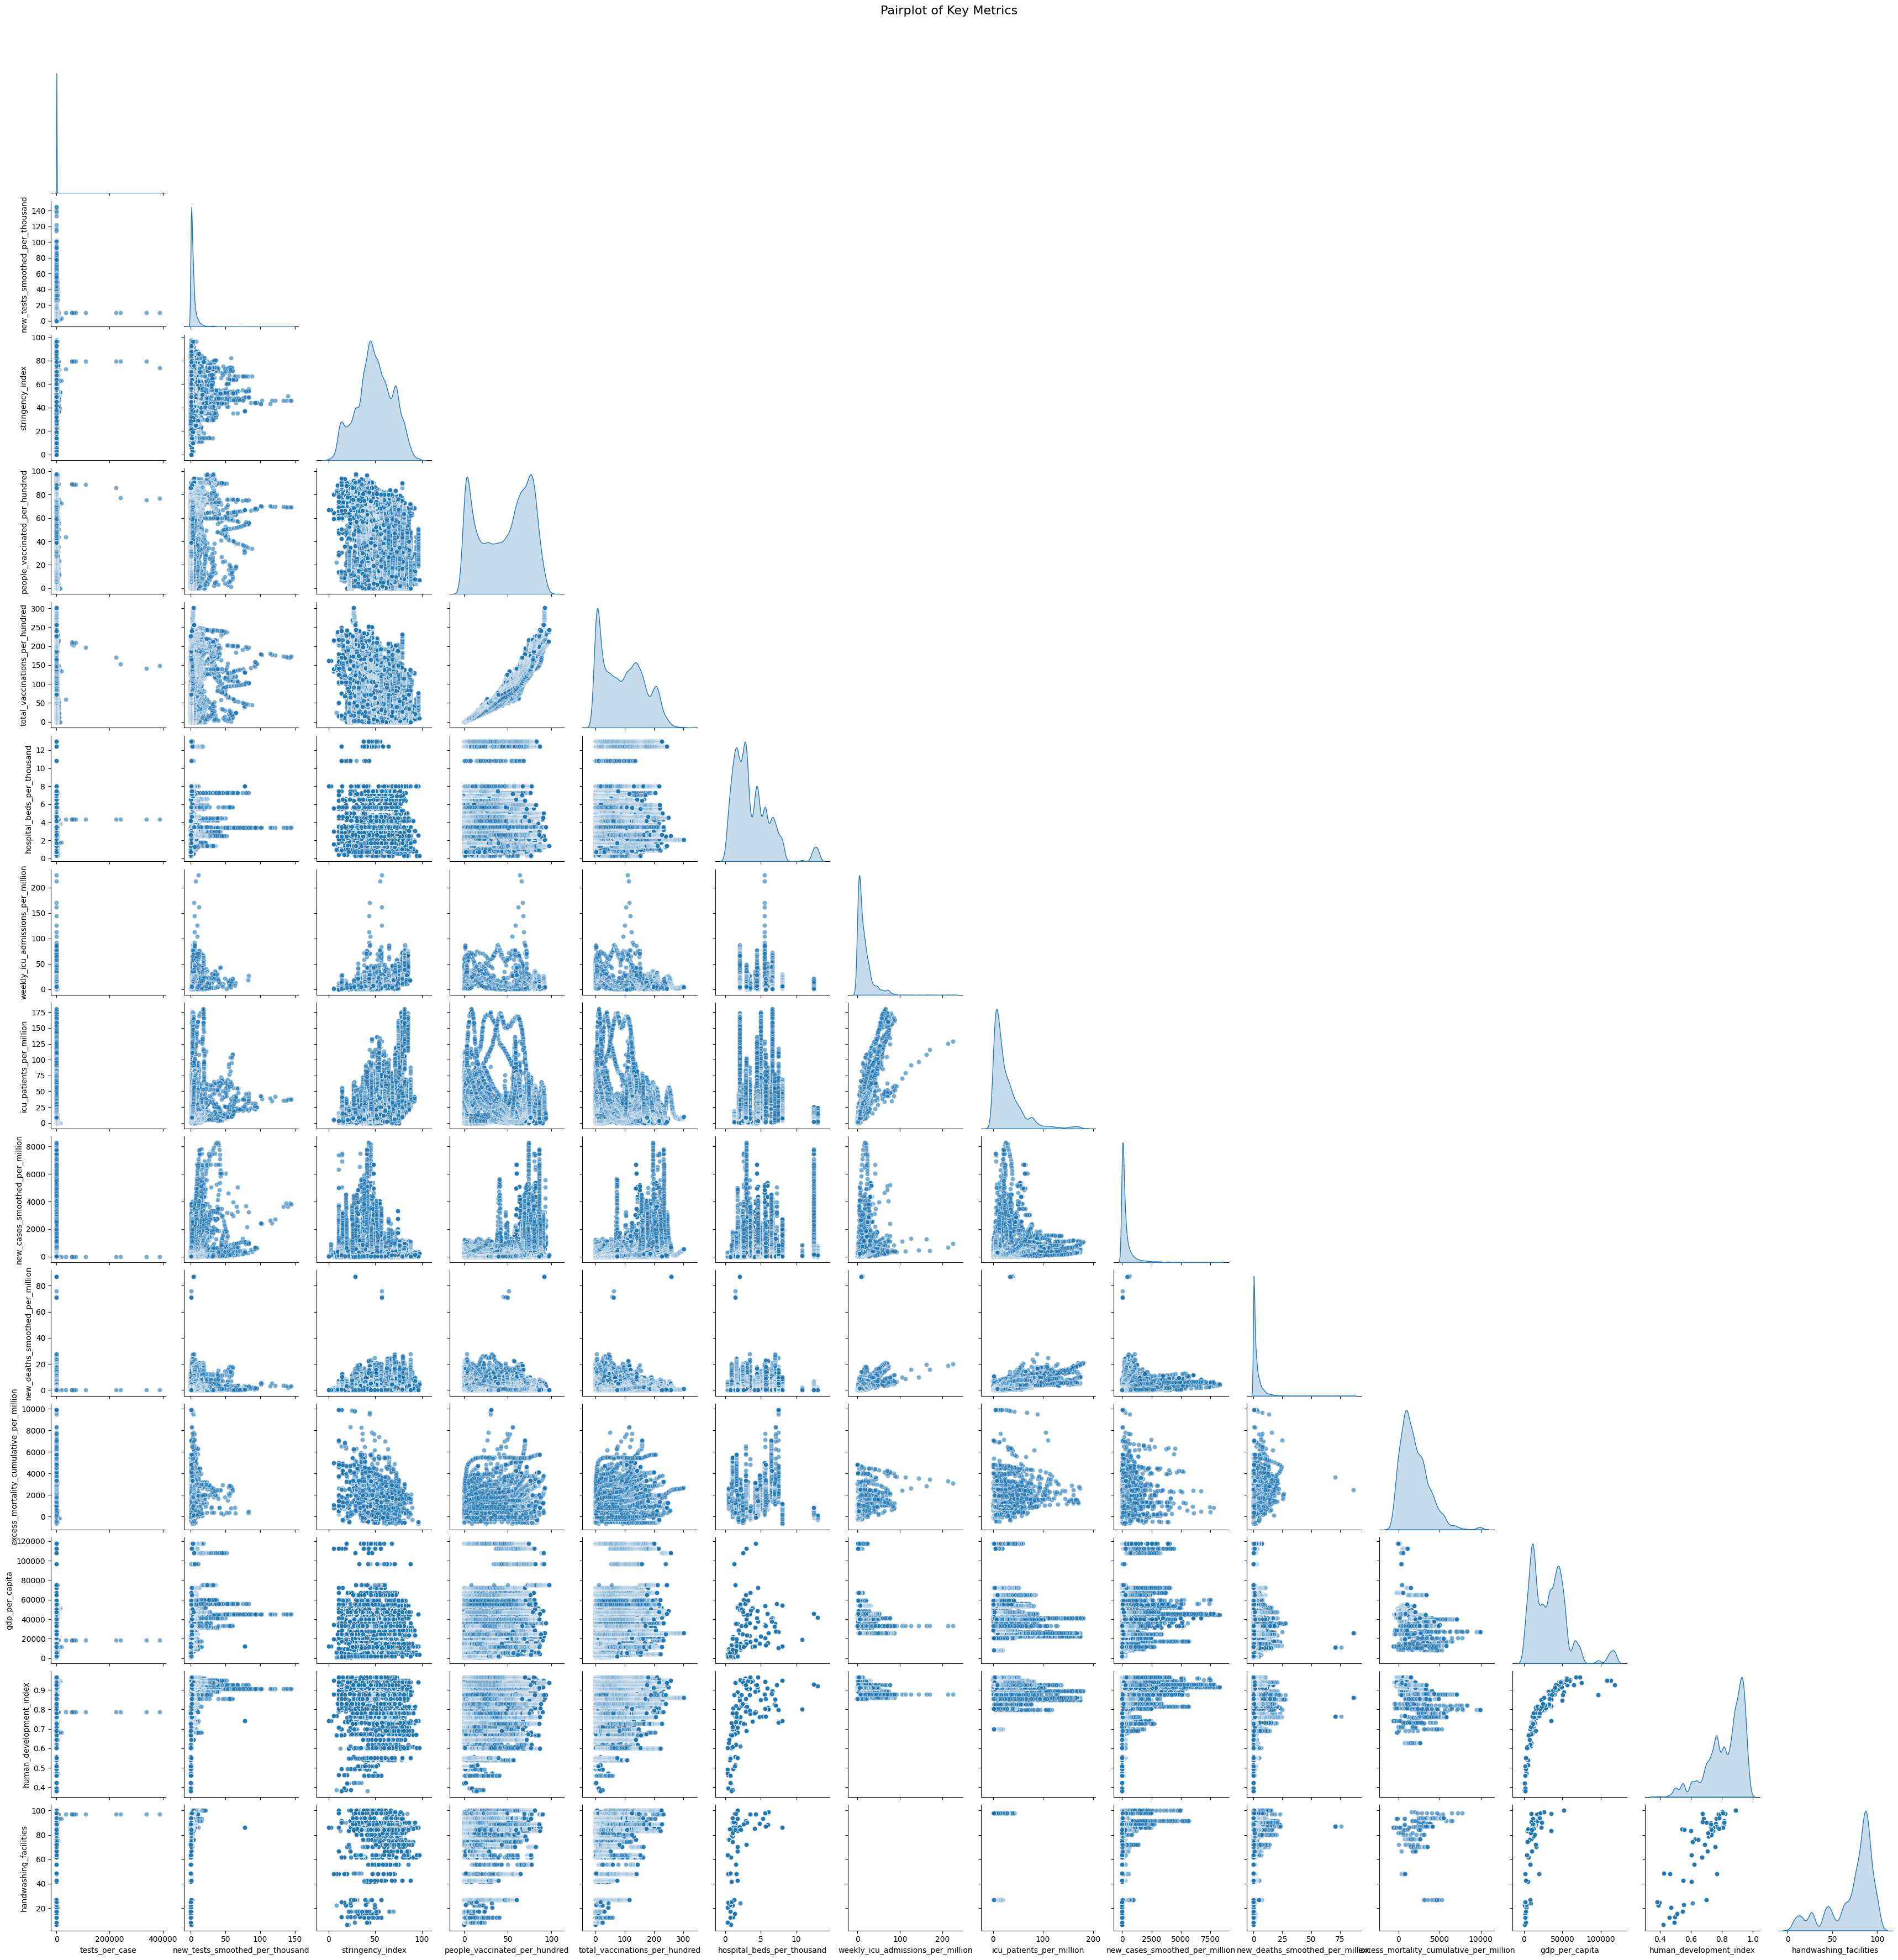

In [14]:
# Pairplot for key numeric columns
sns.pairplot(df_holistic[numeric_cols], diag_kind="kde", corner=True, plot_kws={"alpha": 0.6})
plt.suptitle("Pairplot of Key Metrics", y=1.02, fontsize=16)
plt.show()


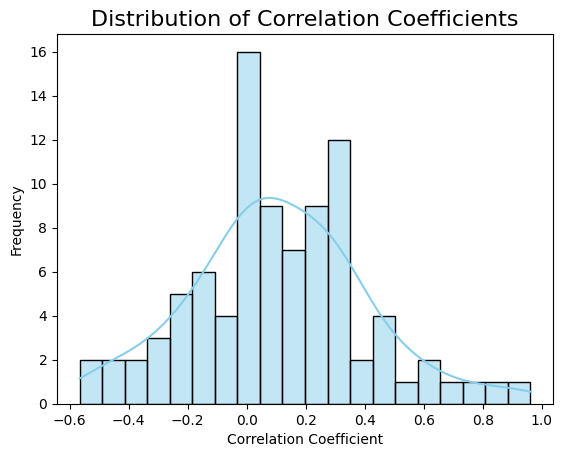

In [15]:
# Flatten the correlation matrix to analyze the distribution of correlation coefficients
correlations = corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)]

sns.histplot(correlations, bins=20, kde=True, color="skyblue")
plt.title("Distribution of Correlation Coefficients", fontsize=16)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.show()


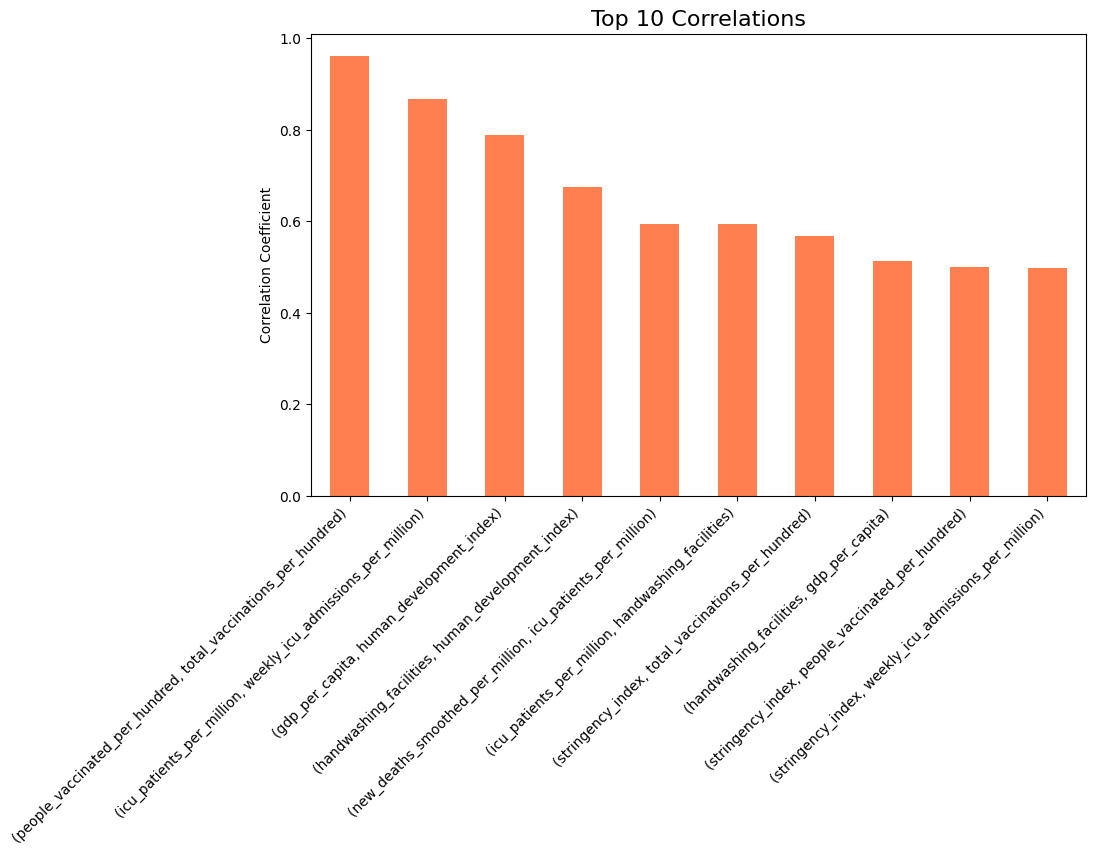

In [ ]:
# Find the top N correlations
top_n = 10
correlation_pairs = (
    corr_matrix.abs()
    .unstack()
    .sort_values(kind="quicksort", ascending=False)
    .drop_duplicates()
)

top_correlations = correlation_pairs[1:top_n + 1]

# Display as a bar chart
top_correlations.plot(kind="bar", figsize=(10, 6), color="coral")
plt.title("Top 10 Correlations", fontsize=16)
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
plt.show()


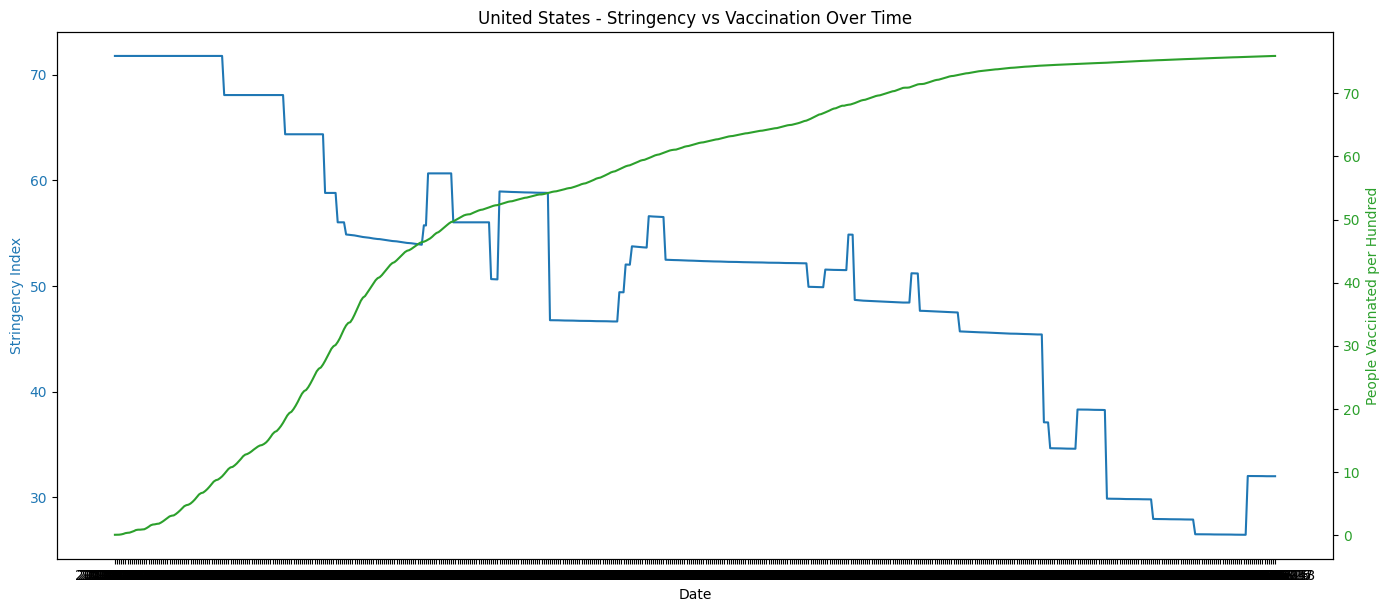

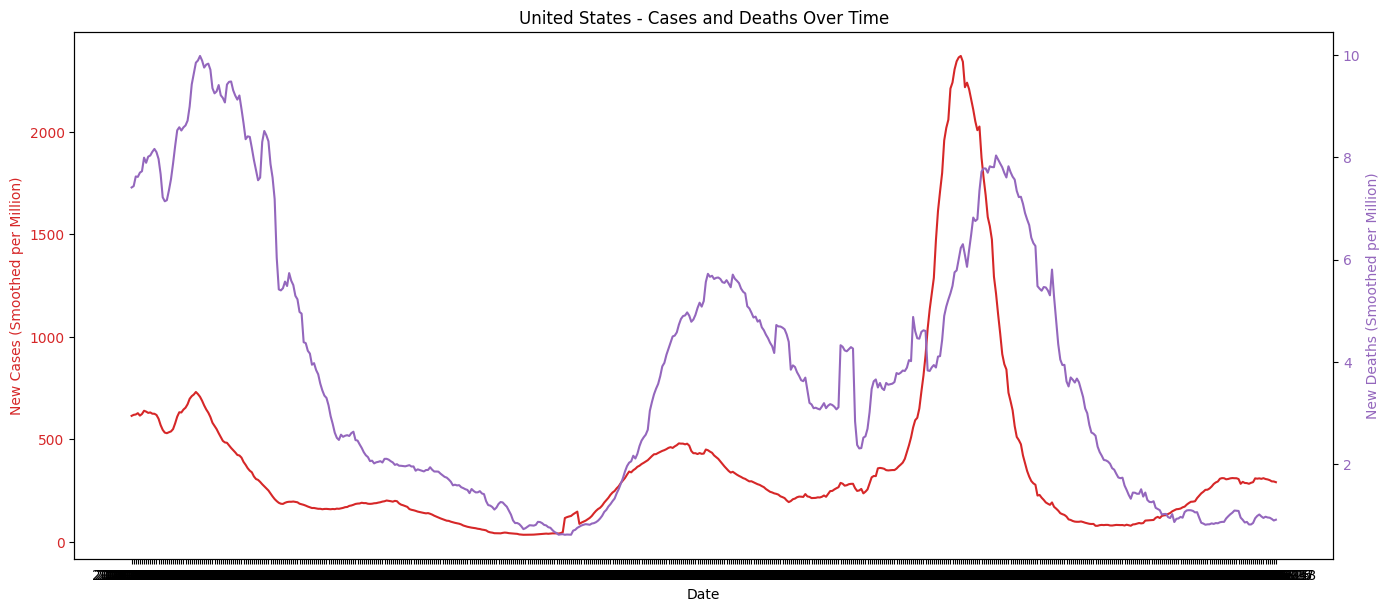

In [ ]:
#Exploratory Data Analysis - Time Series for a Single Country

# To get a better sense of the temporal dynamics, let's pick a single country and visualize
# a few key metrics over time. For demonstration, we'll pick a country that is well-represented in the data.

selected_country = "United States"  
country_df = df_holistic[df_holistic['country'] == selected_country].sort_values('date')

# We'll plot:
# 1. stringency_index and people_vaccinated_per_hundred over time
# 2. new_cases_smoothed_per_million and new_deaths_smoothed_per_million over time

fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stringency Index', color=color)
ax1.plot(country_df['date'], country_df['stringency_index'], color=color, label='Stringency Index')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('People Vaccinated per Hundred', color=color)
ax2.plot(country_df['date'], country_df['people_vaccinated_per_hundred'], color=color, label='Vaccinated per Hundred')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(f"{selected_country} - Stringency vs Vaccination Over Time")
plt.show()


fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases (Smoothed per Million)', color=color)
ax1.plot(country_df['date'], country_df['new_cases_smoothed_per_million'], color=color, label='New Cases Smoothed')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:purple'
ax2.set_ylabel('New Deaths (Smoothed per Million)', color=color)
ax2.plot(country_df['date'], country_df['new_deaths_smoothed_per_million'], color=color, label='New Deaths Smoothed')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(f"{selected_country} - Cases and Deaths Over Time")
plt.show()

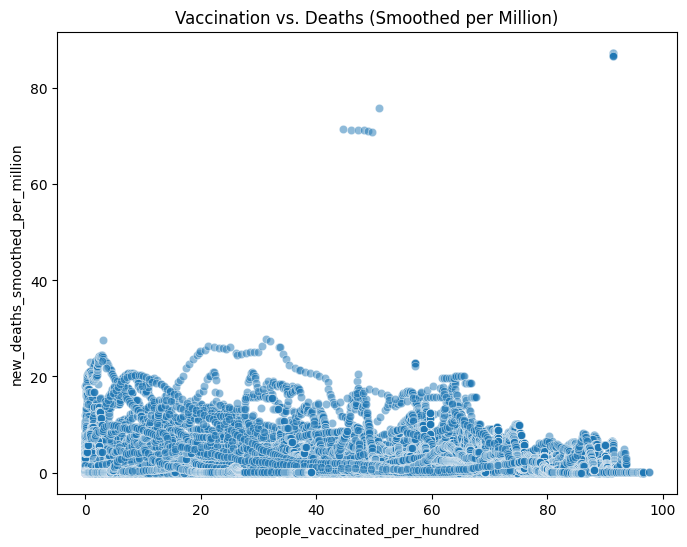

In [19]:
# Scatter plot to see relationship between vaccination and deaths
plt.figure(figsize=(8,6))
sns.scatterplot(x='people_vaccinated_per_hundred', y='new_deaths_smoothed_per_million', data=df_holistic, alpha=0.5)
plt.title("Vaccination vs. Deaths (Smoothed per Million)")
plt.show()

In [ ]:
#Creating Lagged Features for a Single Country (as a demonstration)

# We will illustrate the lagging process on one country first, then we can generalize to all countries.
selected_country = "United States"
country_df = df_holistic[df_holistic['country'] == selected_country].copy()
country_df = country_df.sort_values('date')

# We hypothesize that today's testing/stringency affects future case rates and outcomes.
# Let's create a 14-day lag (2-week lag) for testing and stringency metrics as an example.

lag_days = 14
country_df['tests_per_case_lag14'] = country_df['tests_per_case'].shift(lag_days)
country_df['stringency_index_lag14'] = country_df['stringency_index'].shift(lag_days)
country_df['people_vaccinated_per_hundred_lag14'] = country_df['people_vaccinated_per_hundred'].shift(lag_days)

# Similarly, we might consider outcomes like new_deaths_smoothed_per_million as dependent variables.
# Because we have introduced a shift, some initial rows will become NaN. Let's drop those.
country_df = country_df.dropna(subset=['tests_per_case_lag14', 'stringency_index_lag14', 'people_vaccinated_per_hundred_lag14'])

print("DataFrame with lagged features (example):")
country_df[['date', 'tests_per_case', 'tests_per_case_lag14', 'stringency_index', 'stringency_index_lag14', 'people_vaccinated_per_hundred', 'people_vaccinated_per_hundred_lag14']].head(20)

DataFrame with lagged features (example):


,date,tests_per_case,tests_per_case_lag14,stringency_index,stringency_index_lag14,people_vaccinated_per_hundred,people_vaccinated_per_hundred_lag14
425371,2020-12-27,8.206576,9.030841,71.76,71.76,0.888576,0.010780
425372,2020-12-28,8.156084,8.905380,71.76,71.76,1.059047,0.012141
425373,2020-12-29,8.123336,8.807073,71.76,71.76,1.266693,0.025732
425374,2020-12-30,8.055692,8.718650,71.76,71.76,1.509197,0.071266
425375,2020-12-31,7.996251,8.668546,71.76,71.76,1.630960,0.149808
425376,2021-01-01,8.027653,8.615336,71.76,71.76,1.667370,0.270316
425377,2021-01-02,8.085284,8.521440,71.76,71.76,1.743360,0.322960
425378,2021-01-03,8.071265,8.461135,71.76,71.76,1.782539,0.353678
425379,2021-01-04,7.983867,8.430002,71.76,71.76,1.959848,0.464769
425380,2021-01-05,7.851103,8.399441,71.76,71.76,2.176037,0.594167


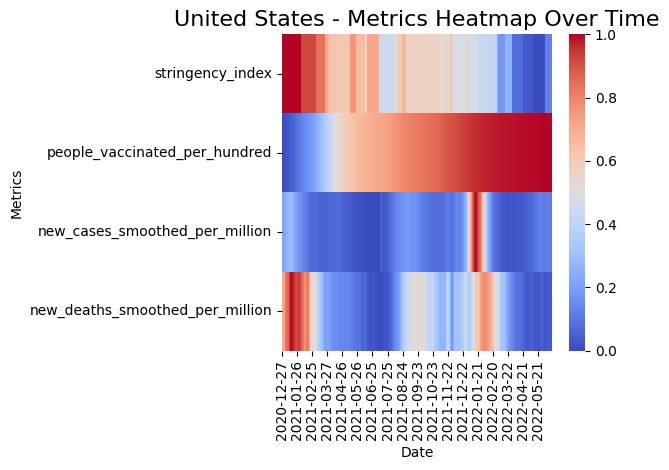

In [21]:
# Prepare data for heatmap
heatmap_data = country_df.set_index('date')[
    ['stringency_index', 'people_vaccinated_per_hundred', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million']
]

# Normalize data for better visual comparison
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

sns.heatmap(heatmap_data.T, cmap='coolwarm', cbar=True, xticklabels=30, yticklabels=True)
plt.title(f"{selected_country} - Metrics Heatmap Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Metrics")
plt.tight_layout()
plt.show()


In [23]:
# Preparing a Multi-Country Panel with Lagged Variables

# Define a function to add lagged variables for a single country
def add_lags_for_country(data, lag_days=14):
    """
    Adds lagged variables for key metrics to the data of a single country.
    
    Parameters:
        data (pd.DataFrame): Data for a single country, sorted by date.
        lag_days (int): Number of days for lagging the metrics.
    
    Returns:
        pd.DataFrame: Data with lagged variables added.
    """
    data = data.sort_values('date')  # Ensure data is sorted by date
    for col in ['tests_per_case', 'stringency_index', 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred']:
        data[f'{col}_lag{lag_days}'] = data[col].shift(lag_days)
    return data

# Apply the lagging function to each country
lag_days = 14
df_lagged = df_holistic.groupby('country', group_keys=False).apply(lambda x: add_lags_for_country(x, lag_days=lag_days))

# Drop rows with missing lagged values
lagged_columns = [f'{col}_lag{lag_days}' for col in ['tests_per_case', 'stringency_index', 'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred']]
df_lagged.dropna(subset=lagged_columns, inplace=True)

# Display the results
print(f"Data after adding lagged features for all countries: {df_lagged.shape[0]} rows and {df_lagged.shape[1]} columns.")
df_lagged.head()

Data after adding lagged features for all countries: 28793 rows and 20 columns.


/var/folders/kt/m1zsknls3gj5p3b8zb7wh6s40000gn/T/ipykernel_48543/2001379399.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_lagged = df_holistic.groupby('country', group_keys=False).apply(lambda x: add_lags_for_country(x, lag_days=lag_days))


,country,date,tests_per_case,new_tests_smoothed_per_thousand,stringency_index,people_vaccinated_per_hundred,total_vaccinations_per_hundred,hospital_beds_per_thousand,weekly_icu_admissions_per_million,icu_patients_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,excess_mortality_cumulative_per_million,gdp_per_capita,human_development_index,handwashing_facilities,tests_per_case_lag14,stringency_index_lag14,people_vaccinated_per_hundred_lag14,total_vaccinations_per_hundred_lag14
860,Afghanistan,2022-05-10,96.755000,0.027,11.11,13.125799,14.859311,0.39,NaN,NaN,0.383733,0.007041,NaN,1516.2733,0.462,48.214695,2.205620,19.44,11.420438,12.856447
865,Afghanistan,2022-05-15,44.867893,0.027,11.11,13.208680,14.950102,0.39,NaN,NaN,1.126555,0.021123,NaN,1516.2733,0.462,48.214695,2.081265,19.44,11.640095,13.113502
873,Afghanistan,2022-05-23,19.559086,0.027,11.11,13.325815,15.078194,0.39,NaN,NaN,1.580697,0.028164,NaN,1516.2733,0.462,48.214695,3.389429,19.44,11.832579,13.337760
882,Afghanistan,2022-06-01,9.693004,0.011,11.11,13.447694,15.209038,0.39,NaN,NaN,1.802487,0.021123,NaN,1516.2733,0.462,48.214695,6.573062,19.44,12.092650,13.640738
896,Afghanistan,2022-06-15,7.015059,0.011,11.11,13.734188,15.513556,0.39,NaN,NaN,1.591258,0.003520,NaN,1516.2733,0.462,48.214695,6.891709,19.44,12.205236,13.793221


In [ ]:
#Simple Linear Regression (Proof of Concept)

# We'll create a simple regression model to predict new_deaths_smoothed_per_million from lagged features.
X = country_df[['tests_per_case_lag14', 'stringency_index_lag14', 'people_vaccinated_per_hundred_lag14']]
y = country_df['new_deaths_smoothed_per_million']

# Add a constant for the regression model
X = sm.add_constant(X)

model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     new_deaths_smoothed_per_million   R-squared:                       0.753
Model:                                         OLS   Adj. R-squared:                  0.751
Method:                              Least Squares   F-statistic:                     542.3
Date:                             Tue, 10 Dec 2024   Prob (F-statistic):          9.39e-162
Time:                                     09:22:29   Log-Likelihood:                -889.63
No. Observations:                              539   AIC:                             1787.
Df Residuals:                                  535   BIC:                             1804.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                                          coef    std err          t      P>|t| 

In [ ]:
#Bayesian Hierarchical Modeling with pymc


# For simplicity, let's select a subset of the dataset or a certain time period, to reduce runtime.
model_data = df_lagged.dropna(subset=['new_deaths_smoothed_per_million'])
model_data = model_data.sample(n=5000, random_state=42)  # subsample for demonstration if large dataset
model_data.reset_index(drop=True, inplace=True)

# Encode 'country' as a categorical variable for random effects
model_data['country_id'] = model_data['country'].astype('category').cat.codes

num_cores = multiprocessing.cpu_count()

# Identify numeric features to scale
features_to_scale = [
    'tests_per_case_lag',
    'stringency_index_lag',
    'people_vaccinated_per_hundred_lag',
    'total_vaccinations_per_hundred_lag',
    'gdp_per_capita',
    'human_development_index',
    'handwashing_facilities'
]

# Scale these features
scaler = StandardScaler()
model_data[features_to_scale] = scaler.fit_transform(model_data[features_to_scale])

# Scale the outcome as well
outcome_scaler = StandardScaler()
model_data['new_deaths_smoothed_per_million'] = outcome_scaler.fit_transform(model_data[['new_deaths_smoothed_per_million']])

with pm.Model() as hierarchical_model:
    # Narrower priors
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    
    beta_tests = pm.Normal('beta_tests', mu=0, sigma=0.5)
    beta_stringency = pm.Normal('beta_stringency', mu=0, sigma=0.5)
    beta_vax = pm.Normal('beta_vax', mu=0, sigma=0.5)
    beta_gdp = pm.Normal('beta_gdp', mu=0, sigma=0.5)
    beta_hdi = pm.Normal('beta_hdi', mu=0, sigma=0.5)
    beta_hw = pm.Normal('beta_hw', mu=0, sigma=0.5)
    
    sigma_country = pm.HalfNormal('sigma_country', sigma=0.5)
    country_intercept = pm.Normal('country_intercept', mu=0, sigma=sigma_country, shape=len(model_data['country_id'].unique()))

    mu = (intercept 
         + country_intercept[model_data['country_id'].values]
         + beta_tests * model_data['tests_per_case_lag'].values
         + beta_stringency * model_data['stringency_index_lag'].values
         + beta_vax * model_data['people_vaccinated_per_hundred_lag'].values
         + beta_gdp * model_data['gdp_per_capita'].values
         + beta_hdi * model_data['human_development_index'].values
         + beta_hw * model_data['handwashing_facilities'].values)
    
    sigma = pm.HalfNormal('sigma', sigma=1)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=model_data['new_deaths_smoothed_per_million'].values)

    trace = pm.sample(
        draws=1000,     # can adjust as needed
        tune=1000,
        chains=num_cores,
        cores=num_cores,
        target_accept=0.9
    )

az.summary(trace, var_names=['intercept','beta_tests','beta_stringency','beta_vax','beta_gdp','beta_hdi','beta_hw', 'sigma', 'sigma_country'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [intercept, beta_tests, beta_stringency, beta_vax, beta_gdp, beta_hdi, beta_hw, sigma_country, country_intercept, sigma]


Sampling 8 chains for 1_000 tune and 1_000 draw iterations (8_000 + 8_000 draws total) took 307 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.018,0.098,-0.167,0.199,0.003,0.002,1165.0,1839.0,1.01
beta_tests,-0.012,0.011,-0.033,0.009,0.000,0.000,7154.0,5421.0,1.00
beta_stringency,0.135,0.014,0.108,0.162,0.000,0.000,6114.0,5905.0,1.00
beta_vax,-0.142,0.015,-0.169,-0.113,0.000,0.000,5962.0,5882.0,1.00
beta_gdp,-0.037,0.154,-0.320,0.252,0.003,0.003,2095.0,2936.0,1.00
beta_hdi,0.430,0.162,0.117,0.722,0.004,0.003,1668.0,2105.0,1.00
beta_hw,-0.025,0.123,-0.254,0.211,0.003,0.002,1747.0,2658.0,1.00
sigma,0.693,0.007,0.680,0.706,0.000,0.000,9068.0,5964.0,1.00
sigma_country,0.618,0.069,0.490,0.743,0.001,0.001,4993.0,5443.0,1.00
